In [109]:
import requests
import json
import datetime
import time
from dateutil.relativedelta import relativedelta
import pandas as pd
from bs4 import BeautifulSoup
from os import error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Defining Parameters and the API Call function

In [3]:
def getCreds():
    creds = dict()
    creds['access_token'] = ''
    creds['client_id'] = '    creds['client_secret'] = ''
    creds['graph_domain'] = 'https://graph.facebook.com'
    creds['graph_version'] = 'v13.0'
    creds['endpoint_base'] = creds['graph_domain'] + '/' + creds['graph_version'] + '/'
    creds['debug'] = 'no'
    creds['page_id'] = ''
    creds['instagram_account_id'] = ''
    creds['ig_username'] = 'datapond'

    return creds

def makeApiCall(url, endpointParams, debug = 'no') :
    data = requests.get(url, endpointParams)

    response = dict()
    response['url'] = url
    response['endpoint_params'] = endpointParams
    response['endpoint_params_pretty'] = json.dumps( endpointParams, indent = 4)
    response['json_data'] = json.loads(data.content)
    response['json_data_pretty'] = json.dumps(response['json_data'], indent = 4)

    if ( 'yes' == debug):
        displayApiCallData(response)
   
    return response

def displayApiCallData(response):
    print("\nURL:")
    print(response['url'])
    print("\nEndpoint Params:")
    print(response['endpoint_params_pretty'])
    print("\nResponse:")
    print(response['json_data_pretty'])


# 2. Retrieving the Access Token 

In [4]:
def debugAccessToken(params):
    endpointParams = dict()
    endpointParams['input_token'] = params['access_token']
    endpointParams['access_token'] = params['access_token']

    url = params['graph_domain'] + '/debug_token'

    return makeApiCall( url, endpointParams, params['debug'])

params = getCreds()
params['debug'] = 'yes'
response = debugAccessToken(params)

print ("\nExpires at:")
print (datetime.datetime.fromtimestamp(response['json_data']['data']['data_access_expires_at']))


URL:
https://graph.facebook.com/debug_token

Endpoint Params:
{
    "input_token": "EAAPn1SD4BvkBAKmiszjf5MpyhX9GV5ApKAtFkYwTXgTbTxSXfiM9uIB3eQvszwkSHVUCGrtSjFElj9jeaqvVp7jhZA3c9XYw3x9tGp7H7t1SSmrDF2BJr2ZAIzqTvvZA7tMYwlzvXGT0Hb9KC27j2PJQuZCg2ixHDU3bmZBhMgwZDZD",
    "access_token": "EAAPn1SD4BvkBAKmiszjf5MpyhX9GV5ApKAtFkYwTXgTbTxSXfiM9uIB3eQvszwkSHVUCGrtSjFElj9jeaqvVp7jhZA3c9XYw3x9tGp7H7t1SSmrDF2BJr2ZAIzqTvvZA7tMYwlzvXGT0Hb9KC27j2PJQuZCg2ixHDU3bmZBhMgwZDZD"
}

Response:
{
    "data": {
        "app_id": "1099327497307897",
        "type": "USER",
        "application": "Graph API Test",
        "data_access_expires_at": 1675694716,
        "expires_at": 0,
        "is_valid": true,
        "issued_at": 1648357025,
        "scopes": [
            "pages_show_list",
            "instagram_basic",
            "instagram_manage_comments",
            "instagram_manage_insights",
            "pages_read_engagement",
            "pages_manage_posts",
            "public_profile"
        ],


# 3. Retrieving the Long Live Access Token

In [5]:
def getLongLivedAccessToken(params):
    endpointParams = dict()
    endpointParams['grant_type'] = 'fb_exchange_token'
    endpointParams['client_id'] = params['client_id']
    endpointParams['client_secret'] = params['client_secret']
    endpointParams['fb_exchange_token'] = params['access_token']

    url = params['endpoint_base'] + 'oauth/access_token'

    return makeApiCall(url, endpointParams, params['debug'])
  
params = getCreds()
params['debug'] = 'yes'
response = getLongLivedAccessToken(params)

print("\n ----- ACCESS TOKEN INFO ---- \n")
print("Access Token:")
print(response['json_data']['access_token'])


URL:
https://graph.facebook.com/v13.0/oauth/access_token

Endpoint Params:
{
    "grant_type": "fb_exchange_token",
    "client_id": "1099327497307897",
    "client_secret": "5e8c0afdc0396f62fa18a4d1a997ba04",
    "fb_exchange_token": "EAAPn1SD4BvkBAKmiszjf5MpyhX9GV5ApKAtFkYwTXgTbTxSXfiM9uIB3eQvszwkSHVUCGrtSjFElj9jeaqvVp7jhZA3c9XYw3x9tGp7H7t1SSmrDF2BJr2ZAIzqTvvZA7tMYwlzvXGT0Hb9KC27j2PJQuZCg2ixHDU3bmZBhMgwZDZD"
}

Response:
{
    "access_token": "EAAPn1SD4BvkBAG7zsIiCLZCS8BO0IpWMWUvJeEU1UFwK0FPctBfGUgvXf6slLAU3BKqVMDt3Ye0EOxRrPoA7NBklVZAPx41cZAawyGmakQf8CbNC5ZAIvzM1RjZCempMTm22aDzOtxFS3LO1jM6ehckfaKGz3qnAEOF7FNZCT58KE2E7maCvL7",
    "token_type": "bearer"
}

 ----- ACCESS TOKEN INFO ---- 

Access Token:
EAAPn1SD4BvkBAG7zsIiCLZCS8BO0IpWMWUvJeEU1UFwK0FPctBfGUgvXf6slLAU3BKqVMDt3Ye0EOxRrPoA7NBklVZAPx41cZAawyGmakQf8CbNC5ZAIvzM1RjZCempMTm22aDzOtxFS3LO1jM6ehckfaKGz3qnAEOF7FNZCT58KE2E7maCvL7


# 4. Getting the Instagram Account ID

In [6]:
def getInstagramAccount(params):

    endpointParams = dict()
    endpointParams['access_token'] = params['access_token']
    endpointParams['fields'] = 'instagram_business_account'

    url = params['endpoint_base'] + params['page_id']

    return makeApiCall(url, endpointParams, params['debug'])

params = getCreds()
params['debug'] = 'yes'
response = getInstagramAccount(params)

print("\n---- INSTAGRAM ACCOUNT INFO ----\n")
print("\nPage Id:")
print(response['json_data']['id'])
print("\nInstagram Id:")
print(response['json_data']['instagram_business_account']['id'])


URL:
https://graph.facebook.com/v13.0/102682665736966

Endpoint Params:
{
    "access_token": "EAAPn1SD4BvkBAKmiszjf5MpyhX9GV5ApKAtFkYwTXgTbTxSXfiM9uIB3eQvszwkSHVUCGrtSjFElj9jeaqvVp7jhZA3c9XYw3x9tGp7H7t1SSmrDF2BJr2ZAIzqTvvZA7tMYwlzvXGT0Hb9KC27j2PJQuZCg2ixHDU3bmZBhMgwZDZD",
    "fields": "instagram_business_account"
}

Response:
{
    "instagram_business_account": {
        "id": "17841416178748460"
    },
    "id": "102682665736966"
}

---- INSTAGRAM ACCOUNT INFO ----


Page Id:
102682665736966

Instagram Id:
17841416178748460


# 5. Getting Instagram Account info (username / name / follower count / number of accounts following / number of posts)

In [7]:
def getAccountInfo(params):

    endpointParams = dict()
    endpointParams['fields'] = "business_discovery.username(" + params['ig_username'] + "){username, website, name, ig_id, id, profile_picture_url, biography, follows_count, followers_count, media_count}"
    endpointParams['access_token'] = params['access_token']

    url = params['endpoint_base'] + '/' + params['instagram_account_id'] 

    return makeApiCall (url, endpointParams, params['debug'])

params = getCreds()
params['debug'] = 'no'
response = getAccountInfo(params)

Total_Followers = response['json_data']['business_discovery']['followers_count']

print("\n---- ACCOUNT INFO ---- \n")

print("\nUsername:")
print(response['json_data']['business_discovery']['username'])
print("\nName:")
print(response['json_data']['business_discovery']['name'])
print("\nNumber following:")
print(response['json_data']['business_discovery']['follows_count'])
print("\nNumber of followers:")
print(response['json_data']['business_discovery']['followers_count'])
print('\nNumber of posts:')
print(response['json_data']['business_discovery']['media_count'])


---- ACCOUNT INFO ---- 


Username:
datapond

Name:
Datapond

Number following:
2936

Number of followers:
4244

Number of posts:
365


# 6. Account Insights Summary (Daily)

In [147]:
currentdate = datetime.date.today()
sincedate = currentdate + relativedelta(days=-30)

currentdateUnix = time.mktime(currentdate.timetuple())
sincedateUnix = time.mktime(sincedate.timetuple())

def getUserInsights(params):

    endpointParams = dict()
    endpointParams['metric'] = 'follower_count, impressions, profile_views, reach'
    endpointParams['period'] = 'day'
    endpointParams['since'] = sincedateUnix
    endpointParams['until'] = currentdateUnix
    endpointParams['access_token'] = params['access_token']

    url = params['endpoint_base'] + params['instagram_account_id'] + '/insights'

    return makeApiCall(url, endpointParams, params['debug'])   

params['debug'] = "no"
response = getUserInsights(params)

Table1 = pd.DataFrame(columns= ["Date","Follower_Count"])
Table2 = pd.DataFrame(columns= ["Date","Impressions"])
Table3 = pd.DataFrame(columns= ["Date","Profile_Views"])
Table4 = pd.DataFrame(columns= ["Date","Reach"])

for insight in response['json_data']['data']:

    if insight["name"] == "follower_count":
        for value in insight['values'] : 
            follower_count = value['value']
            date = value['end_time']
            Table1 = Table1.append({'Date': date, 'Follower_Count': follower_count}, ignore_index = True)

    elif insight["name"] == "impressions":
        for value in insight['values'] : 
            impressions = value['value']
            date = value['end_time']
            Table2 = Table2.append({'Date': date, 'Impressions': impressions}, ignore_index = True)

    elif insight["name"] == "profile_views":
        for value in insight['values'] : 
            profile_views = value['value']
            date = value['end_time']
            Table3 = Table3.append({'Date': date, 'Profile_Views': profile_views}, ignore_index = True)
    
    elif insight["name"] == "reach":
        for value in insight['values'] : 
            Reach = value['value']
            date = value['end_time']
            Table4 = Table4.append({'Date': date, 'Reach': Reach}, ignore_index = True) 

DailyMetricsTable = Table1.merge(Table2, on="Date", how="left")
DailyMetricsTable = DailyMetricsTable.merge(Table3, on="Date", how="left")
DailyMetricsTable = DailyMetricsTable.merge(Table4, on="Date", how="left")

DailyMetricsTable['Real_Date'] = pd.to_datetime(DailyMetricsTable['Date']).dt.date

#Convert Data Types to Int
DailyMetricsTable["Follower_Count"] = DailyMetricsTable["Follower_Count"].astype(int)
DailyMetricsTable["Impressions"] = DailyMetricsTable["Impressions"].astype(int)
DailyMetricsTable["Profile_Views"] = DailyMetricsTable["Profile_Views"].astype(int)
DailyMetricsTable["Reach"] = DailyMetricsTable["Reach"].astype(int)

display(DailyMetricsTable)

,Date,Follower_Count,Impressions,Profile_Views,Reach,Real_Date
0,2022-10-12T07:00:00+0000,31,4293,123,2079,2022-10-12
1,2022-10-13T07:00:00+0000,14,4241,87,1847,2022-10-13
2,2022-10-14T07:00:00+0000,15,1261,48,746,2022-10-14
3,2022-10-15T07:00:00+0000,10,6401,55,2971,2022-10-15
4,2022-10-16T07:00:00+0000,16,6478,109,2734,2022-10-16
5,2022-10-17T07:00:00+0000,231,17380,644,7064,2022-10-17
6,2022-10-18T07:00:00+0000,107,11344,380,4569,2022-10-18
7,2022-10-19T07:00:00+0000,17,7176,104,3355,2022-10-19
8,2022-10-20T07:00:00+0000,18,1721,108,679,2022-10-20
9,2022-10-21T07:00:00+0000,20,7218,101,2414,2022-10-21


# 7. Monthly Impressions and Reach (per month)

In [9]:
currentdate = datetime.date.today()
sincedate = currentdate + relativedelta(days=-30)

currentdateUnix = time.mktime(currentdate.timetuple())
sincedateUnix = time.mktime(sincedate.timetuple())

def getUserInsights(params):

    endpointParams = dict()
    endpointParams['metric'] = 'impressions, reach'
    endpointParams['period'] = 'days_28'
    endpointParams['since'] = sincedateUnix
    endpointParams['until'] = currentdateUnix
    endpointParams['access_token'] = params['access_token']

    url = params['endpoint_base'] + params['instagram_account_id'] + '/insights'

    return makeApiCall(url, endpointParams, params['debug'])   

params['debug'] = "no"
response = getUserInsights(params)

Table1 = pd.DataFrame(columns= ["Date","Impressions"])
Table2 = pd.DataFrame(columns= ["Date","Reach"])

for insight in response['json_data']['data']:

    if insight["name"] == "impressions":
        for value in insight['values'] : 
            impressions = value['value']
            date = value['end_time']
            Table1 = Table1.append({'Date': date, 'Impressions': impressions}, ignore_index = True)
    
    elif insight["name"] == "reach":
        for value in insight['values'] : 
            Reach = value['value']
            date = value['end_time']
            Table2 = Table2.append({'Date': date, 'Reach': Reach}, ignore_index = True) 

MonthlyMetricsTable = Table1.merge(Table2, on="Date", how="left")

MonthlyMetricsTable['Real_Date'] = pd.to_datetime(MonthlyMetricsTable['Date']).dt.date
MonthlyMetricsTable["Impressions"] = MonthlyMetricsTable["Impressions"].astype(int)
MonthlyMetricsTable["Reach"] = MonthlyMetricsTable["Reach"].astype(int)

display(MonthlyMetricsTable)

,Date,Impressions,Reach,Real_Date
0,2022-10-12T07:00:00+0000,153777,30830,2022-10-12
1,2022-10-13T07:00:00+0000,152728,29556,2022-10-13
2,2022-10-14T07:00:00+0000,150064,29243,2022-10-14
3,2022-10-15T07:00:00+0000,151920,30105,2022-10-15
4,2022-10-16T07:00:00+0000,153177,29805,2022-10-16
5,2022-10-17T07:00:00+0000,166679,33831,2022-10-17
6,2022-10-18T07:00:00+0000,172954,35773,2022-10-18
7,2022-10-19T07:00:00+0000,176862,36062,2022-10-19
8,2022-10-20T07:00:00+0000,172248,35718,2022-10-20
9,2022-10-21T07:00:00+0000,174545,35228,2022-10-21


# 8. IG User Insights - Lifetime Stats (City, Country, Gender/Age)

In [10]:
def getDemographicInsights(params):

    endpointParams = dict()
    endpointParams['metric'] = 'audience_city, audience_country, audience_gender_age, audience_locale'
    endpointParams['period'] = 'lifetime'
    endpointParams['access_token'] = params['access_token']

    url = params['endpoint_base'] + params['instagram_account_id'] + '/insights'

    return makeApiCall(url, endpointParams, params['debug'])  

params['debug'] = "no"
response = getDemographicInsights(params)

#Set up variables that retrieve items for each specific metric
CityData = response['json_data']['data'][0]['values'][0]['value'].items()
CountryData = response['json_data']['data'][1]['values'][0]['value'].items()
AudienceGenderData = response['json_data']['data'][2]['values'][0]['value'].items()
AudienceLocale = response['json_data']['data'][3]['values'][0]['value'].items()

#City Data - Only top 45 cities with highest values returned
CityInsights = pd.DataFrame(columns= ["City","Followers"])
for item in CityData:
    City = item[0]
    Followers = item[1]
    CityInsights = CityInsights.append({'City': City, 'Followers': Followers}, ignore_index = True)
    
#Adding Percentage of Total column and sorting
CityInsights["Followers"] = CityInsights["Followers"].astype(int)
CityInsights['Percentage_of_Total'] = (CityInsights['Followers'] / Total_Followers)*100
CityInsights = CityInsights.sort_values(['Percentage_of_Total'], ascending = False)
CityInsights.reset_index(drop=True,inplace=True)

    
#Country Data - Only top 45 countries with highest values returned.
CountryInsights = pd.DataFrame(columns= ["Country Code","Followers"])
for item in CountryData:
    Country = item[0]
    Followers = item[1]
    CountryInsights = CountryInsights.append({'Country Code': Country, 'Followers': Followers}, ignore_index = True)
    
#Adding Percentage of Total column and sorting
CountryInsights["Followers"] = CountryInsights["Followers"].astype(int)
CountryInsights['Percentage_of_Total'] = (CountryInsights['Followers'] / Total_Followers)*100
CountryInsights = CountryInsights.sort_values(['Percentage_of_Total'], ascending = False)
CountryInsights.reset_index(drop=True,inplace=True)

    
#Audience Gender Data    
AudienceGenderInsights = pd.DataFrame(columns= ["Audience_Gender","Followers"])    
for item in AudienceGenderData:
    Audience_Gender = item[0]
    Followers = item[1]
    AudienceGenderInsights = AudienceGenderInsights.append({'Audience_Gender': Audience_Gender, 'Followers': Followers}, ignore_index = True)
    AudienceGenderInsights['Gender'] = AudienceGenderInsights['Audience_Gender'].astype(str).str[0]
    AudienceGenderInsights['Age Group'] = AudienceGenderInsights['Audience_Gender'].astype(str).str[2:]  

#Adding Percentage of Total column and sorting
AudienceGenderInsights["Followers"] = AudienceGenderInsights["Followers"].astype(int)
AudienceGenderInsights['Percentage_of_Total'] = (AudienceGenderInsights['Followers'] / Total_Followers)*100
AudienceGenderInsights.reset_index(drop=True,inplace=True)
    
display(CityInsights.head(10))
display(CountryInsights.head(10))
display(AudienceGenderInsights.head(10))

,City,Followers,Percentage_of_Total
0,"New York, New York",101,2.379830
1,"London, England",73,1.720075
2,"Los Angeles, California",64,1.508011
3,"Mexico City, Distrito Federal",43,1.013195
4,"Melbourne, Victoria",33,0.777568
5,"Toronto, Ontario",31,0.730443
6,"Seoul, Seoul",27,0.636192
7,"Santiago, Santiago Metropolitan Region",26,0.612630
8,"Houston, Texas",24,0.565504
9,"Montreal, Quebec",24,0.565504


,Country Code,Followers,Percentage_of_Total
0,US,1714,40.386428
1,GB,280,6.597549
2,CA,209,4.924599
3,IT,130,3.063148
4,AU,126,2.968897
5,MX,114,2.686145
6,IN,102,2.403393
7,FR,93,2.191329
8,DE,89,2.097078
9,BR,83,1.955702


,Audience_Gender,Followers,Gender,Age Group,Percentage_of_Total
0,F.13-17,29,F,13-17,0.683318
1,F.18-24,219,F,18-24,5.160226
2,F.25-34,193,F,25-34,4.547597
3,F.35-44,45,F,35-44,1.060320
4,F.45-54,12,F,45-54,0.282752
5,F.55-64,2,F,55-64,0.047125
6,F.65+,6,F,65+,0.141376
7,M.13-17,119,M,13-17,2.803959
8,M.18-24,1203,M,18-24,28.345900
9,M.25-34,771,M,25-34,18.166824


In [11]:
#Summary Statistics
print("City Insights Summary Stats")
print(CityInsights.describe())
print('\n')
print("Country Insights Summary Stats")
print(CountryInsights.describe())
print('\n')
print("Audience Gender Summary Stats")
print(AudienceGenderInsights.describe())
print('\n')

City Insights Summary Stats
        Followers  Percentage_of_Total
count   45.000000            45.000000
mean    21.711111             0.511572
std     17.586956             0.414396
min     10.000000             0.235627
25%     12.000000             0.282752
50%     16.000000             0.377003
75%     23.000000             0.541942
max    101.000000             2.379830


Country Insights Summary Stats
         Followers  Percentage_of_Total
count    45.000000            45.000000
mean     87.066667             2.051524
std     253.740150             5.978797
min      13.000000             0.306315
25%      17.000000             0.400566
50%      30.000000             0.706880
75%      55.000000             1.295947
max    1714.000000            40.386428


Audience Gender Summary Stats
         Followers  Percentage_of_Total
count    21.000000            21.000000
mean    199.761905             4.706925
std     317.402884             7.478862
min       2.000000             0.047

# 9. Using Beautiful Soup to Webscrape Country Codes and Coordinates

In [12]:
url = 'https://developers.google.com/public-data/docs/canonical/countries_csv'

with requests.Session() as session:
    info = session.get(url)
    soup = BeautifulSoup(info.text, 'html.parser')

html_table = soup.find_all('table')[0]
data = pd.read_html(html_table.prettify())
Geodata = data[0]
Geodata["Country Code"] = Geodata["country"]
Geodata["Country"] = Geodata["name"]
Geodata.drop(['country', 'name'], axis=1, inplace=True)

print(Geodata)

      latitude  longitude Country Code               Country
0    42.546245   1.601554           AD               Andorra
1    23.424076  53.847818           AE  United Arab Emirates
2    33.939110  67.709953           AF           Afghanistan
3    17.060816 -61.796428           AG   Antigua and Barbuda
4    18.220554 -63.068615           AI              Anguilla
..         ...        ...          ...                   ...
240  15.552727  48.516388           YE                 Yemen
241 -12.827500  45.166244           YT               Mayotte
242 -30.559482  22.937506           ZA          South Africa
243 -13.133897  27.849332           ZM                Zambia
244 -19.015438  29.154857           ZW              Zimbabwe

[245 rows x 4 columns]


# 10. Left Joining the Demographics Table with the Geodata Table

In [13]:
CountryInsights = CountryInsights.merge(Geodata, on='Country Code', how='left')
CountryInsights = CountryInsights[['Country', 'Country Code', 'Followers', 'Percentage_of_Total' , 'latitude', 'longitude']]
CountryInsights = CountryInsights.sort_values(by=['Followers'], ascending = False)

display(CountryInsights.head(10))
#print("\n"+ str(CountryInsights['Followers'].sum()))

,Country,Country Code,Followers,Percentage_of_Total,latitude,longitude
0,United States,US,1714,40.386428,37.090240,-95.712891
1,United Kingdom,GB,280,6.597549,55.378051,-3.435973
2,Canada,CA,209,4.924599,56.130366,-106.346771
3,Italy,IT,130,3.063148,41.871940,12.567380
4,Australia,AU,126,2.968897,-25.274398,133.775136
5,Mexico,MX,114,2.686145,23.634501,-102.552784
6,India,IN,102,2.403393,20.593684,78.962880
7,France,FR,93,2.191329,46.227638,2.213749
8,Germany,DE,89,2.097078,51.165691,10.451526
9,Brazil,BR,83,1.955702,-14.235004,-51.925280


# 11. Storing Instagram Post Data into a Pandas Dataframe

In [14]:
def getUserMedia(params, pagingUrl =''):
    endpointParams = dict()
    endpointParams['fields'] = 'id, caption, media_type, media_product_type, media_url, permalink, thumbnail, url, timestamp, username, like_count, comments_count'
    endpointParams['access_token'] = params['access_token']

    if ('' == pagingUrl):
        url = params['endpoint_base'] + '/' + params['instagram_account_id'] + "/media"
    else:
        url = pagingUrl

    return makeApiCall(url, endpointParams, params['debug'])

def appendToDf(apicall):
    df1 = pd.DataFrame(columns= ["Post_Id","Timestamp", "Post_Link", "Caption", "Media_Type", "Media_Product_Type"])
    for post in apicall['json_data']['data']:
        PostId = post['id']
        PostLink = post['permalink']
        try:
            Caption = post['caption']
        except:
            #in the event that there is no caption, leave it as blank
            Caption = ""
        MediaType = post['media_type']
        MediaProductType = post['media_product_type']
        TimeStamp = post['timestamp']
        LikeCount = post['like_count']
        CommentCount = post['comments_count']
        df1 = df1.append({'Post_Id': PostId, 'Post_Link': PostLink, 'Caption':Caption, 'Media_Type': MediaType, 'Media_Product_Type': MediaProductType, 'Timestamp':TimeStamp, 'Like_count':LikeCount, 'Comments_count':CommentCount}, ignore_index = True)
    return df1

#first API call
params = getCreds()
params['debug'] = 'no'
response = getUserMedia(params)
PostList = appendToDf(response)

try:
    while response['json_data']['paging']['next'] != "" :
        response = getUserMedia(params, response['json_data']['paging']['next'])
        PostList = PostList.append(appendToDf(response))
except:
    PostList = PostList.set_index("Post_Id")
    Save_Path = '/Users/Jason Lee/Desktop/jupyter notebooks/Instagram_API/'
    PostList.to_csv(Save_Path +'Post Data.csv', index = True)
    display(PostList.head()) 

,Timestamp,Post_Link,Caption,Media_Type,Media_Product_Type,Comments_count,Like_count
Post_Id,,,,,,,
17853116600833153,2022-11-10T13:01:43+0000,https://www.instagram.com/p/CkyAdk3SX6T/,Bill Gates In 1994 Sitting On Top Of How Many ...,CAROUSEL_ALBUM,FEED,3.0,469.0
17906584481670016,2022-11-09T13:21:28+0000,https://www.instagram.com/p/Ckvd7StSgUx/,Desire paths: The illicit trails that defy urb...,CAROUSEL_ALBUM,FEED,10.0,736.0
18023868478432463,2022-11-08T06:54:05+0000,https://www.instagram.com/p/CksMzHIrfAG/,"Panda Keepers in Sichuan, China\n\nPanda Keepe...",CAROUSEL_ALBUM,FEED,3.0,668.0
17978092390753685,2022-11-04T14:20:43+0000,https://www.instagram.com/p/Ckisu2cBcZQ/,Cacti Installations by Cyril Lancelin,CAROUSEL_ALBUM,FEED,4.0,409.0
17857368536808058,2022-11-03T12:57:50+0000,https://www.instagram.com/p/Ckf-c87LR5E/,The Ground Fridge - Studio Floris Schoonderbee...,CAROUSEL_ALBUM,FEED,5.0,641.0


In [15]:
#Filter Feed and Reels
PostListFeed = PostList[PostList['Media_Product_Type'] == 'FEED']
PostListReels = PostList[PostList['Media_Product_Type'] == 'REELS']

display(PostListFeed)
display(PostListReels)


,Timestamp,Post_Link,Caption,Media_Type,Media_Product_Type,Comments_count,Like_count
Post_Id,,,,,,,
17853116600833153,2022-11-10T13:01:43+0000,https://www.instagram.com/p/CkyAdk3SX6T/,Bill Gates In 1994 Sitting On Top Of How Many ...,CAROUSEL_ALBUM,FEED,3.0,469.0
17906584481670016,2022-11-09T13:21:28+0000,https://www.instagram.com/p/Ckvd7StSgUx/,Desire paths: The illicit trails that defy urb...,CAROUSEL_ALBUM,FEED,10.0,736.0
18023868478432463,2022-11-08T06:54:05+0000,https://www.instagram.com/p/CksMzHIrfAG/,"Panda Keepers in Sichuan, China\n\nPanda Keepe...",CAROUSEL_ALBUM,FEED,3.0,668.0
17978092390753685,2022-11-04T14:20:43+0000,https://www.instagram.com/p/Ckisu2cBcZQ/,Cacti Installations by Cyril Lancelin,CAROUSEL_ALBUM,FEED,4.0,409.0
17857368536808058,2022-11-03T12:57:50+0000,https://www.instagram.com/p/Ckf-c87LR5E/,The Ground Fridge - Studio Floris Schoonderbee...,CAROUSEL_ALBUM,FEED,5.0,641.0
...,...,...,...,...,...,...,...
17974652110445594,2022-01-16T13:36:54+0000,https://www.instagram.com/tv/CYyvYNClZIg/,Royal Marines LLC testing the Gravity Jet Suit...,VIDEO,FEED,1.0,17.0
17907960200506137,2022-01-16T04:08:48+0000,https://www.instagram.com/p/CYxulnKpEeL/,@balenciaga x @_ikeuchi \nSpring 22 collection,CAROUSEL_ALBUM,FEED,2.0,13.0
18125880637249416,2022-01-16T03:54:43+0000,https://www.instagram.com/p/CYxs-ZxJtG1/,SenseTime AI detection,CAROUSEL_ALBUM,FEED,1.0,7.0


,Timestamp,Post_Link,Caption,Media_Type,Media_Product_Type,Comments_count,Like_count
Post_Id,,,,,,,
17997237505553762,2022-11-02T12:53:22+0000,https://www.instagram.com/reel/CkdY8K_DFL-/,Plant movement in a 24hr period 🪴,VIDEO,REELS,4.0,314.0
18157828432301739,2022-10-30T08:29:05+0000,https://www.instagram.com/reel/CkVLk3PsW0E/,A drowsy polar bear resting in a meadow during...,VIDEO,REELS,6.0,423.0
17951347364229071,2022-10-19T12:37:44+0000,https://www.instagram.com/reel/Cj5UAjltxPO/,Time Lapse of a Giant Pumpkin Growing\n\nAt pe...,VIDEO,REELS,5.0,450.0
17869988342771746,2022-09-20T13:56:14+0000,https://www.instagram.com/reel/Ciux2Urvm7y/,"Asteroid hyalosis, a condition where calcium d...",VIDEO,REELS,12.0,460.0
18230000593178812,2022-09-09T15:17:59+0000,https://www.instagram.com/reel/CiSlRsorGBH/,India’s Well of Death\n\nAt festivals across n...,VIDEO,REELS,4.0,420.0
18003441844470126,2022-08-24T16:11:32+0000,https://www.instagram.com/reel/ChpgCQKFZKv/,A Sheepdog herding in New Zealand (2022),VIDEO,REELS,5.0,505.0
17935335914494463,2022-07-19T15:13:21+0000,https://www.instagram.com/reel/CgMs3Dcl_QU/,3D Printing Electronics directly onto skin\n\n...,VIDEO,REELS,7.0,231.0
18040113931356740,2022-06-21T15:03:34+0000,https://www.instagram.com/reel/CfElJL2lPi_/,🤖,VIDEO,REELS,2.0,187.0
18058417957316014,2022-06-11T14:04:47+0000,https://www.instagram.com/reel/Cequn-ilEwR/,CT Scans of flowers by @azumamakoto,VIDEO,REELS,5.0,146.0


# 12. Getting Post Insights using the Post ID

In [16]:
def getMediaInsights(params):

    endpointParams = dict()
    endpointParams['metric'] = params['metric']
    endpointParams['access_token'] = params['access_token']

    url = params['endpoint_base'] + params['post_id'] + '/insights'
    return makeApiCall(url, endpointParams, params['debug'])

params = getCreds()
InsightsFeed_df = pd.DataFrame(columns= ["Post_Id", "Engagement", "Impressions", "Reach", "Saved"])
InsightsReels_df = pd.DataFrame(columns= ["Post_Id","Engagement", "Impressions",  "Reach", "Saved", "Shares"])

for PostID in PostListFeed.index:
    params['post_id'] = PostID
    MediaType = PostListFeed.loc[PostID]["Media_Type"]
    MediaProductType = PostListFeed.loc[PostID]["Media_Product_Type"]

    if MediaType == "VIDEO":
        params['metric'] = 'engagement, impressions, reach, saved, video_views'
    else:
        params['metric'] = 'engagement, impressions, reach, saved'

    params['debug'] = "no"

    try:
        response = getMediaInsights(params)
    
        for insight in response['json_data']['data']:
            if insight['name'] == 'engagement':
                engagement_value = insight['values'][0]['value']
            elif insight['name'] == 'impressions':
                impressions_value = insight['values'][0]['value']
            elif insight['name'] == 'reach':
                reach_value = insight['values'][0]['value']
            elif insight['name'] == 'saved':
                saved_value = insight['values'][0]['value']
    
        InsightsFeed_df = InsightsFeed_df.append({'Post_Id': PostID, 'Engagement': engagement_value, 'Impressions': impressions_value, 'Reach': reach_value, 'Saved': saved_value}, ignore_index = True)
        
    except:
        print("unable to find Feed " + PostID)


#Reels Section        
for PostID in PostListReels.index:
    params['post_id'] = PostID
    MediaType = PostListReels.loc[PostID]["Media_Type"]
    MediaProductType = PostListReels.loc[PostID]["Media_Product_Type"]

    params['metric'] = 'comments, likes, plays, reach, saved, shares, total_interactions'
    params['debug'] = "no"
    
    try:
        response = getMediaInsights(params)
    
        for insight in response['json_data']['data']:
            if insight['name'] == 'total_interactions':
                engagement_value = insight['values'][0]['value']
            elif insight['name'] == 'plays':
                impressions_value = insight['values'][0]['value']
            elif insight['name'] == 'reach':
                reach_value = insight['values'][0]['value']
            elif insight['name'] == 'saved':
                saved_value = insight['values'][0]['value']
            elif insight['name'] == 'shares':
                shares_value = insight['values'][0]['value']
    
        InsightsReels_df = InsightsReels_df.append({'Post_Id': PostID, 'Engagement': engagement_value, 'Impressions': impressions_value, 'Reach': reach_value, 'Saved': saved_value, 'Shares': shares_value}, ignore_index = True)
        
    except:
        print("unable to find Reel " + PostID)
        
    
display(InsightsFeed_df)
display(InsightsReels_df)


,Post_Id,Engagement,Impressions,Reach,Saved
0,17853116600833153,517,2642,2335,45
1,17906584481670016,864,3590,2880,118
2,18023868478432463,739,4560,3854,68
3,17978092390753685,461,2379,2009,48
4,17857368536808058,732,3626,2912,86
...,...,...,...,...,...
337,17974652110445594,20,273,246,2
338,17907960200506137,20,222,208,5
339,18125880637249416,13,209,187,5
340,18275657749026912,11,219,205,1


,Post_Id,Engagement,Impressions,Reach,Saved,Shares
0,17997237505553762,403,3636,3340,35,50
1,18157828432301739,653,5562,5351,68,156
2,17951347364229071,559,4171,3834,53,51
3,17869988342771746,666,6137,5864,86,108
4,18230000593178812,629,6211,6168,54,151
5,18003441844470126,699,5608,5349,73,116
6,17935335914494463,298,2966,2619,44,16
7,18040113931356740,249,1566,1499,26,34
8,18058417957316014,186,1513,1497,25,10
9,17912150867422055,233,1556,1522,29,24


In [17]:
#Clean the reels DF
#InsightsReels_df['Engagement'] = InsightsReels_df['Engagement'] - InsightsReels_df['Shares']
#InsightsReels_df = InsightsReels_df.drop('Shares', axis=1, inplace=True)

Insights_df = InsightsFeed_df.append(InsightsReels_df, ignore_index = True)
Insights_df = Insights_df.set_index('Post_Id')
display(Insights_df)

,Engagement,Impressions,Reach,Saved,Shares
Post_Id,,,,,
17853116600833153,517,2642,2335,45,NaN
17906584481670016,864,3590,2880,118,NaN
18023868478432463,739,4560,3854,68,NaN
17978092390753685,461,2379,2009,48,NaN
17857368536808058,732,3626,2912,86,NaN
...,...,...,...,...,...
18159178219213439,201,2057,2138,29,22
17885240591554947,94,632,616,5,4
18130482442254622,130,1146,1162,19,9


In [298]:
# Left joining the PostList table to the Insightsdf table
PostInsight = PostList.merge(Insights_df, on='Post_Id', how='left')
PostInsight["Date"] = pd.to_datetime(PostInsight["Timestamp"]).dt.date

Grouped = PostInsight.groupby(['Date'])['Impressions'].sum()

#Changing Datatypes
PostInsight["Comments_count"] = PostInsight["Comments_count"].astype(int)
PostInsight["Like_count"] = PostInsight["Like_count"].astype(int)
PostInsight["Engagement"] = PostInsight["Engagement"].astype(int)
PostInsight["Impressions"] = PostInsight["Impressions"].astype(int)
PostInsight["Reach"] = PostInsight["Reach"].astype(int)
PostInsight["Saved"] = PostInsight["Saved"].astype(int)
PostInsight["Date"] = PostInsight["Date"].astype('datetime64[ns]')
PostInsight["Timestamp"] = PostInsight["Timestamp"].astype('datetime64[ns]')

#Add Index
PostInsight = PostInsight.set_index("Date")

#Adding a Quarter Column
q1_slice =  PostInsight.loc[PostInsight.index.month <= 3 ].copy()
q1_slice['Quarter'] = "Q1"
q2_slice = PostInsight.loc[(PostInsight.index.month >= 4) & (PostInsight.index.month <= 6)].copy()
q2_slice['Quarter'] = "Q2"
q3_slice = PostInsight.loc[(PostInsight.index.month >= 7) & (PostInsight.index.month <= 9)].copy()
q3_slice['Quarter'] = "Q3"
q4_slice = PostInsight.loc[(PostInsight.index.month >= 10) & (PostInsight.index.month <= 12)].copy()
q4_slice['Quarter'] = "Q4"
PostInsight = q1_slice.append([q2_slice, q3_slice, q4_slice])

#Remapping
PostInsight['Media_Type'] = PostInsight['Media_Type'].replace(to_replace='CAROUSEL_ALBUM', value='IMAGE')

display(PostInsight.head(10))

,Timestamp,Post_Link,Caption,Media_Type,Media_Product_Type,Comments_count,Like_count,Engagement,Impressions,Reach,Saved,Shares,Quarter
Date,,,,,,,,,,,,,
2022-03-31,2022-03-31 13:08:56,https://www.instagram.com/tv/CbxPBy1lWBk/,A massive supercell storm drifting over southe...,VIDEO,FEED,1,62,72,621,567,9,NaN,Q1
2022-03-31,2022-03-31 12:57:19,https://www.instagram.com/p/CbxN5Udr5Xt/,aesthetics found,IMAGE,FEED,2,82,90,605,521,6,NaN,Q1
2022-03-31,2022-03-31 12:31:20,https://www.instagram.com/p/CbxK69yrE8r/,get_in_the_robot_shinji.exe,IMAGE,FEED,3,146,170,1858,1634,21,NaN,Q1
2022-03-29,2022-03-29 14:00:49,https://www.instagram.com/p/CbsLkpPvM_b/,A Fata Morgana is a complex form of superior m...,IMAGE,FEED,3,193,222,1825,1695,26,NaN,Q1
2022-03-29,2022-03-29 13:02:25,https://www.instagram.com/reel/CbsEY3yl104/,"As they expect to see you drowning, keep on fl...",VIDEO,REELS,5,92,114,919,963,8,9,Q1
2022-03-29,2022-03-29 12:31:30,https://www.instagram.com/p/CbsBWaMLloo/,Multi-color Balaclavas,IMAGE,FEED,3,63,85,928,857,19,NaN,Q1
2022-03-27,2022-03-27 10:18:59,https://www.instagram.com/p/CbmomJuvkMC/,Neon Fantasy - Keith Macgregor\n\nThe neon bil...,IMAGE,FEED,4,94,121,848,740,23,NaN,Q1
2022-03-27,2022-03-27 08:52:42,https://www.instagram.com/p/CbmeuL5PDH_/,Particle Collision Simulations,IMAGE,FEED,3,95,124,718,643,26,NaN,Q1
2022-03-27,2022-03-27 07:23:37,https://www.instagram.com/p/CbmUhp5LRDt/,Assorted Hood Designs\n\nvia @archived.dreams,IMAGE,FEED,1,172,233,3070,2900,60,NaN,Q1


In [19]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'ODBC Driver 17 for SQL Server',
 'ODBC Driver 18 for SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

# 13. Available Dataframes

In [21]:
#Available Data Frames
display(PostInsight)
display(CountryInsights)
display(CityInsights)
display(AudienceGenderInsights)
display(DailyMetricsTable)
display(MonthlyMetricsTable)

,Post_Id,Timestamp,Post_Link,Caption,Media_Type,Media_Product_Type,Comments_count,Like_count,Engagement,Impressions,Reach,Saved,Shares,Date
0,17853116600833153,2022-11-10T13:01:43+0000,https://www.instagram.com/p/CkyAdk3SX6T/,Bill Gates In 1994 Sitting On Top Of How Many ...,CAROUSEL_ALBUM,FEED,3.0,469.0,517,2642,2335,45,NaN,2022-11-10
1,17906584481670016,2022-11-09T13:21:28+0000,https://www.instagram.com/p/Ckvd7StSgUx/,Desire paths: The illicit trails that defy urb...,CAROUSEL_ALBUM,FEED,10.0,736.0,864,3590,2880,118,NaN,2022-11-09
2,18023868478432463,2022-11-08T06:54:05+0000,https://www.instagram.com/p/CksMzHIrfAG/,"Panda Keepers in Sichuan, China\n\nPanda Keepe...",CAROUSEL_ALBUM,FEED,3.0,668.0,739,4560,3854,68,NaN,2022-11-08
3,17978092390753685,2022-11-04T14:20:43+0000,https://www.instagram.com/p/Ckisu2cBcZQ/,Cacti Installations by Cyril Lancelin,CAROUSEL_ALBUM,FEED,4.0,409.0,461,2379,2009,48,NaN,2022-11-04
4,17857368536808058,2022-11-03T12:57:50+0000,https://www.instagram.com/p/Ckf-c87LR5E/,The Ground Fridge - Studio Floris Schoonderbee...,CAROUSEL_ALBUM,FEED,5.0,641.0,732,3626,2912,86,NaN,2022-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,17974652110445594,2022-01-16T13:36:54+0000,https://www.instagram.com/tv/CYyvYNClZIg/,Royal Marines LLC testing the Gravity Jet Suit...,VIDEO,FEED,1.0,17.0,20,273,246,2,NaN,2022-01-16
361,17907960200506137,2022-01-16T04:08:48+0000,https://www.instagram.com/p/CYxulnKpEeL/,@balenciaga x @_ikeuchi \nSpring 22 collection,CAROUSEL_ALBUM,FEED,2.0,13.0,20,222,208,5,NaN,2022-01-16
362,18125880637249416,2022-01-16T03:54:43+0000,https://www.instagram.com/p/CYxs-ZxJtG1/,SenseTime AI detection,CAROUSEL_ALBUM,FEED,1.0,7.0,13,209,187,5,NaN,2022-01-16
363,18275657749026912,2022-01-15T09:05:01+0000,https://www.instagram.com/p/CYvrsQkJlA0/,Wild Concrete - Romain Jacquet - Lagrèze (2014),CAROUSEL_ALBUM,FEED,0.0,10.0,11,219,205,1,NaN,2022-01-15


,Country,Country Code,Followers,Percentage_of_Total,latitude,longitude
0,United States,US,1714,40.386428,37.090240,-95.712891
1,United Kingdom,GB,280,6.597549,55.378051,-3.435973
2,Canada,CA,209,4.924599,56.130366,-106.346771
3,Italy,IT,130,3.063148,41.871940,12.567380
4,Australia,AU,126,2.968897,-25.274398,133.775136
5,Mexico,MX,114,2.686145,23.634501,-102.552784
6,India,IN,102,2.403393,20.593684,78.962880
7,France,FR,93,2.191329,46.227638,2.213749
8,Germany,DE,89,2.097078,51.165691,10.451526
9,Brazil,BR,83,1.955702,-14.235004,-51.925280


,City,Followers,Percentage_of_Total
0,"New York, New York",101,2.379830
1,"London, England",73,1.720075
2,"Los Angeles, California",64,1.508011
3,"Mexico City, Distrito Federal",43,1.013195
4,"Melbourne, Victoria",33,0.777568
5,"Toronto, Ontario",31,0.730443
6,"Seoul, Seoul",27,0.636192
7,"Santiago, Santiago Metropolitan Region",26,0.612630
8,"Houston, Texas",24,0.565504
9,"Montreal, Quebec",24,0.565504


,Audience_Gender,Followers,Gender,Age Group,Percentage_of_Total
0,F.13-17,29,F,13-17,0.683318
1,F.18-24,219,F,18-24,5.160226
2,F.25-34,193,F,25-34,4.547597
3,F.35-44,45,F,35-44,1.060320
4,F.45-54,12,F,45-54,0.282752
5,F.55-64,2,F,55-64,0.047125
6,F.65+,6,F,65+,0.141376
7,M.13-17,119,M,13-17,2.803959
8,M.18-24,1203,M,18-24,28.345900
9,M.25-34,771,M,25-34,18.166824


,Date,Follower_Count,Impressions,Profile_Views,Reach,Real_Date
0,2022-10-12T07:00:00+0000,31,4293,123,2079,2022-10-12
1,2022-10-13T07:00:00+0000,14,4241,87,1847,2022-10-13
2,2022-10-14T07:00:00+0000,15,1261,48,746,2022-10-14
3,2022-10-15T07:00:00+0000,10,6401,55,2971,2022-10-15
4,2022-10-16T07:00:00+0000,16,6478,109,2734,2022-10-16
5,2022-10-17T07:00:00+0000,231,17380,644,7064,2022-10-17
6,2022-10-18T07:00:00+0000,107,11344,380,4569,2022-10-18
7,2022-10-19T07:00:00+0000,17,7176,104,3355,2022-10-19
8,2022-10-20T07:00:00+0000,18,1721,108,679,2022-10-20
9,2022-10-21T07:00:00+0000,20,7218,101,2414,2022-10-21


,Date,Impressions,Reach,Real_Date
0,2022-10-12T07:00:00+0000,153777,30830,2022-10-12
1,2022-10-13T07:00:00+0000,152728,29556,2022-10-13
2,2022-10-14T07:00:00+0000,150064,29243,2022-10-14
3,2022-10-15T07:00:00+0000,151920,30105,2022-10-15
4,2022-10-16T07:00:00+0000,153177,29805,2022-10-16
5,2022-10-17T07:00:00+0000,166679,33831,2022-10-17
6,2022-10-18T07:00:00+0000,172954,35773,2022-10-18
7,2022-10-19T07:00:00+0000,176862,36062,2022-10-19
8,2022-10-20T07:00:00+0000,172248,35718,2022-10-20
9,2022-10-21T07:00:00+0000,174545,35228,2022-10-21


# Barplot of Age and Gender

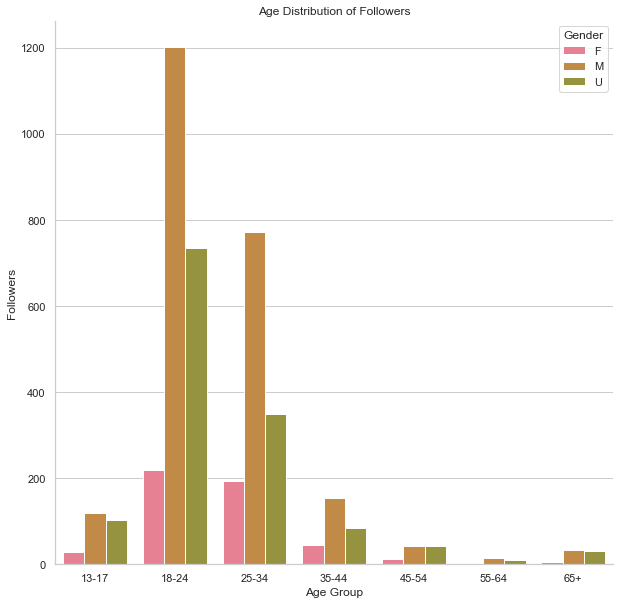

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

#Age Distribution of Followers
sns.set_style("whitegrid")
sns.set_palette("husl", 9)
sns.barplot(data=AudienceGenderInsights, x="Age Group", y="Followers", hue = "Gender", ci=None)
sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4
plt.title('Age Distribution of Followers')
plt.xlabel('Age Group')
plt.ylabel('Followers')
sns.despine()
plt.show()

In [23]:
display(AudienceGenderInsights.pivot_table("Followers", index="Gender", columns="Age Group"))

display(AudienceGenderInsights.groupby("Gender")["Followers"].agg([sum]))

display(AudienceGenderInsights.groupby("Gender")["Followers"].mean())

Age Group,13-17,18-24,25-34,35-44,45-54,55-64,65+
Gender,,,,,,,
F,29,219,193,45,12,2,6
M,119,1203,771,153,42,15,33
U,102,735,349,84,43,10,30


,sum
Gender,
F,506
M,2336
U,1353


Gender
F     72.285714
M    333.714286
U    193.285714
Name: Followers, dtype: float64

# Daily Metrics

In [211]:
display(DailyMetricsTable.describe().round(0))

Reach_mean = DailyMetricsTable.describe()['Reach']['mean']
Reach_std = DailyMetricsTable.describe()['Reach']['std']
Reach_Coeff_of_variance = Reach_std/Reach_mean

print(Reach_Coeff_of_variance)

,Follower_Count,Impressions,Profile_Views,Reach
count,30.0,30.0,30.0,30.0
mean,27.0,6527.0,126.0,3160.0
std,43.0,4664.0,116.0,3822.0
min,0.0,1261.0,44.0,539.0
25%,11.0,4254.0,82.0,1884.0
50%,14.0,6032.0,101.0,2591.0
75%,22.0,6823.0,119.0,3130.0
max,231.0,24934.0,644.0,22173.0


1.209560772502868


In [213]:
#The correlations between all the quantitative metrics in the Daily Metrics Table
display(DailyMetricsTable.corr().round(3))

,Follower_Count,Impressions,Profile_Views,Reach
Follower_Count,1.000,0.448,0.984,0.169
Impressions,0.448,1.000,0.468,0.904
Profile_Views,0.984,0.468,1.000,0.175
Reach,0.169,0.904,0.175,1.000


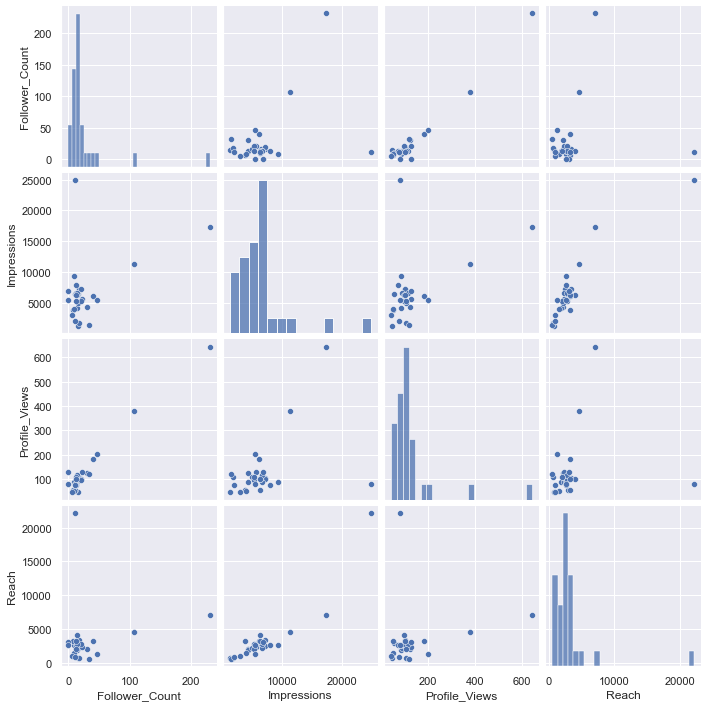

In [26]:
sns.pairplot(DailyMetricsTable, palette="husl")

# Post Insights

In [72]:
display(PostInsight.head())
PostInsight.dtypes

,Post_Id,Timestamp,Post_Link,Caption,Media_Type,Media_Product_Type,Comments_count,Like_count,Engagement,Impressions,Reach,Saved,Shares,Date
0,17853116600833153,2022-11-10 13:01:43,https://www.instagram.com/p/CkyAdk3SX6T/,Bill Gates In 1994 Sitting On Top Of How Many ...,CAROUSEL_ALBUM,FEED,3,469,517,2642,2335,45,NaN,2022-11-10
1,17906584481670016,2022-11-09 13:21:28,https://www.instagram.com/p/Ckvd7StSgUx/,Desire paths: The illicit trails that defy urb...,CAROUSEL_ALBUM,FEED,10,736,864,3590,2880,118,NaN,2022-11-09
2,18023868478432463,2022-11-08 06:54:05,https://www.instagram.com/p/CksMzHIrfAG/,"Panda Keepers in Sichuan, China\n\nPanda Keepe...",CAROUSEL_ALBUM,FEED,3,668,739,4560,3854,68,NaN,2022-11-08
3,17978092390753685,2022-11-04 14:20:43,https://www.instagram.com/p/Ckisu2cBcZQ/,Cacti Installations by Cyril Lancelin,CAROUSEL_ALBUM,FEED,4,409,461,2379,2009,48,NaN,2022-11-04
4,17857368536808058,2022-11-03 12:57:50,https://www.instagram.com/p/Ckf-c87LR5E/,The Ground Fridge - Studio Floris Schoonderbee...,CAROUSEL_ALBUM,FEED,5,641,732,3626,2912,86,NaN,2022-11-03


Post_Id                       object
Timestamp             datetime64[ns]
Post_Link                     object
Caption                       object
Media_Type                    object
Media_Product_Type            object
Comments_count                 int32
Like_count                     int32
Engagement                     int32
Impressions                    int32
Reach                          int32
Saved                          int32
Shares                        object
Date                  datetime64[ns]
dtype: object

In [206]:
#Summary Statistics for all 365 instgram posts
print("Summary Stats - All Posts")
display(PostInsight.describe().round(0))

print("Summary Stats - Q1")
display(PostInsight[PostInsight['Quarter'] == "Q1"].describe().round(0))

print("Summary Stats - Q2")
display(PostInsight[PostInsight['Quarter'] == "Q2"].describe().round(0))

print("Summary Stats - Q3")
display(PostInsight[PostInsight['Quarter'] == "Q3"].describe().round(0))

print("Summary Stats - Q4")
display(PostInsight[PostInsight['Quarter'] == "Q4"].describe().round(0))

Summary Stats - All Posts


,Comments_count,Like_count,Engagement,Impressions,Reach,Saved
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,4.0,192.0,228.0,1863.0,1608.0,30.0
std,3.0,189.0,232.0,2191.0,1946.0,42.0
min,0.0,7.0,11.0,181.0,167.0,0.0
25%,1.0,65.0,76.0,508.0,443.0,8.0
50%,3.0,116.0,137.0,1100.0,963.0,18.0
75%,5.0,279.0,325.0,2716.0,2313.0,40.0
max,25.0,1858.0,2487.0,24787.0,24091.0,611.0


Summary Stats - Q1


,Comments_count,Like_count,Engagement,Impressions,Reach,Saved
count,152.0,152.0,152.0,152.0,152.0,152.0
mean,2.0,65.0,77.0,608.0,551.0,9.0
std,1.0,39.0,47.0,532.0,505.0,8.0
min,0.0,7.0,11.0,181.0,167.0,0.0
25%,1.0,38.0,45.0,298.0,261.0,3.0
50%,2.0,61.0,68.0,402.0,345.0,7.0
75%,3.0,84.0,98.0,719.0,626.0,12.0
max,8.0,243.0,274.0,3984.0,3808.0,60.0


Summary Stats - Q2


,Comments_count,Like_count,Engagement,Impressions,Reach,Saved
count,104.0,104.0,104.0,104.0,104.0,104.0
mean,3.0,152.0,183.0,1488.0,1334.0,26.0
std,3.0,85.0,110.0,1226.0,1196.0,22.0
min,1.0,43.0,51.0,518.0,455.0,5.0
25%,1.0,88.0,106.0,798.0,681.0,12.0
50%,2.0,128.0,146.0,1153.0,1004.0,19.0
75%,4.0,196.0,233.0,1650.0,1518.0,32.0
max,25.0,521.0,663.0,9672.0,9927.0,146.0


Summary Stats - Q3


,Comments_count,Like_count,Engagement,Impressions,Reach,Saved
count,76.0,76.0,76.0,76.0,76.0,76.0
mean,7.0,363.0,431.0,3744.0,3101.0,56.0
std,3.0,132.0,166.0,1941.0,1521.0,31.0
min,2.0,176.0,197.0,1537.0,1295.0,11.0
25%,5.0,264.0,304.0,2588.0,2163.0,37.0
50%,6.0,339.0,390.0,3197.0,2728.0,47.0
75%,8.0,428.0,526.0,4018.0,3441.0,67.0
max,22.0,737.0,883.0,12298.0,10083.0,178.0


Summary Stats - Q4


,Comments_count,Like_count,Engagement,Impressions,Reach,Saved
count,33.0,33.0,33.0,33.0,33.0,33.0
mean,7.0,511.0,602.0,4495.0,3906.0,76.0
std,4.0,280.0,377.0,4014.0,3943.0,101.0
min,3.0,188.0,202.0,1692.0,1376.0,11.0
25%,4.0,384.0,444.0,2955.0,2418.0,39.0
50%,6.0,469.0,556.0,3519.0,2880.0,49.0
75%,9.0,564.0,653.0,4326.0,3834.0,77.0
max,18.0,1858.0,2487.0,24787.0,24091.0,611.0


In [220]:
#Group by month to display summary statistics
display(PostInsight.groupby(PostInsight['Quarter'])[["Reach","Impressions","Engagement","Like_count"]].agg([np.mean, "sum", "count", np.min, np.max]).round(0))

Reach                            Impressions                      \
           mean     sum count  amin   amax        mean     sum count  amin   
Quarter                                                                      
Q1        551.0   83708   152   167   3808       608.0   92472   152   181   
Q2       1334.0  138712   104   455   9927      1488.0  154726   104   518   
Q3       3101.0  235677    76  1295  10083      3744.0  284516    76  1537   
Q4       3906.0  128894    33  1376  24091      4495.0  148337    33  1692   

               Engagement                         Like_count               \
          amax       mean    sum count amin  amax       mean    sum count   
Quarter                                                                     
Q1        3984       77.0  11718   152   11   274       65.0   9929   152   
Q2        9672      183.0  19048   104   51   663      152.0  15801   104   
Q3       12298      431.0  32752    76  197   883      363.0  27607    76   
Q4       24787      602.0  19878    33  202  2487      511.0  16874    33   

                    
        amin  amax  
Quarter             
Q1         7   243  
Q2        43   521  
Q3       176   737  
Q4       188  1858

In [338]:
#Top 10 Posts - Reach
PostInsight = PostInsight.sort_values('Reach', ascending =False)
display(PostInsight[['Caption', 'Post_Link', 'Reach']].head(10))

#Top 10 Posts - Engagement
PostInsight = PostInsight.sort_values('Engagement', ascending =False)
display(PostInsight[['Caption', 'Post_Link', 'Engagement']].head(10))


,Caption,Post_Link,Reach
Date,,,
2022-10-25,Nuclear Pasta - the strongest material in the ...,https://www.instagram.com/p/CkIrwuoSA1L/,24091
2022-10-17,Buddhist monk Matthieu Ricard is the happiest ...,https://www.instagram.com/p/Cjz-nXhLW18/,10194
2022-09-13,Microbiological culture of an 8-year old's han...,https://www.instagram.com/p/Cic0NaYLUR1/,10083
2022-04-26,AFFXWRKS SS2022\n\n1. CORSO Jacket\n2. CORSO P...,https://www.instagram.com/reel/Cc0S6MWFwpn/,9927
2022-09-11,"$50,000 in US bank notes withdrawn from circul...",https://www.instagram.com/p/CiXg6rwrh_T/,7586
2022-07-26,The excavation of a giant leafcutter ant nest ...,https://www.instagram.com/p/CgeyvwHJWZ2/,6803
2022-08-28,Regenerative Ocean Farming\n\nThis type of aqu...,https://www.instagram.com/p/ChzaWb2Losa/,6544
2022-09-09,India’s Well of Death\n\nAt festivals across n...,https://www.instagram.com/reel/CiSlRsorGBH/,6168
2022-08-14,The Super-Kamiokande neutrino detector\n\nHidd...,https://www.instagram.com/p/ChPfC9YrbWr/,5958


,Caption,Post_Link,Engagement
Date,,,
2022-10-17,Buddhist monk Matthieu Ricard is the happiest ...,https://www.instagram.com/p/Cjz-nXhLW18/,2487
2022-10-16,The Enclave - Richard Mosse (2013)\n\nThe Cent...,https://www.instagram.com/p/Cjxg1o2rRrx/,903
2022-09-10,Trees cocooned in spider webs after flooding i...,https://www.instagram.com/p/CiU_w2yr6m0/,883
2022-11-09,Desire paths: The illicit trails that defy urb...,https://www.instagram.com/p/Ckvd7StSgUx/,864
2022-09-30,Bulgarian Kukeri Dancers\n\nIn a practice dati...,https://www.instagram.com/p/CjIqaVrLMsO/,858
2022-09-12,Chindogu: The Unuseless inventions of Kenji Ka...,https://www.instagram.com/p/CiaUicfJfuP/,852
2022-08-14,The Super-Kamiokande neutrino detector\n\nHidd...,https://www.instagram.com/p/ChPfC9YrbWr/,844
2022-10-04,The Katsugyo Bag - A Cutting Edge Fish Carrier...,https://www.instagram.com/p/CjSwcmILuoL/,772
2022-11-08,"Panda Keepers in Sichuan, China\n\nPanda Keepe...",https://www.instagram.com/p/CksMzHIrfAG/,739


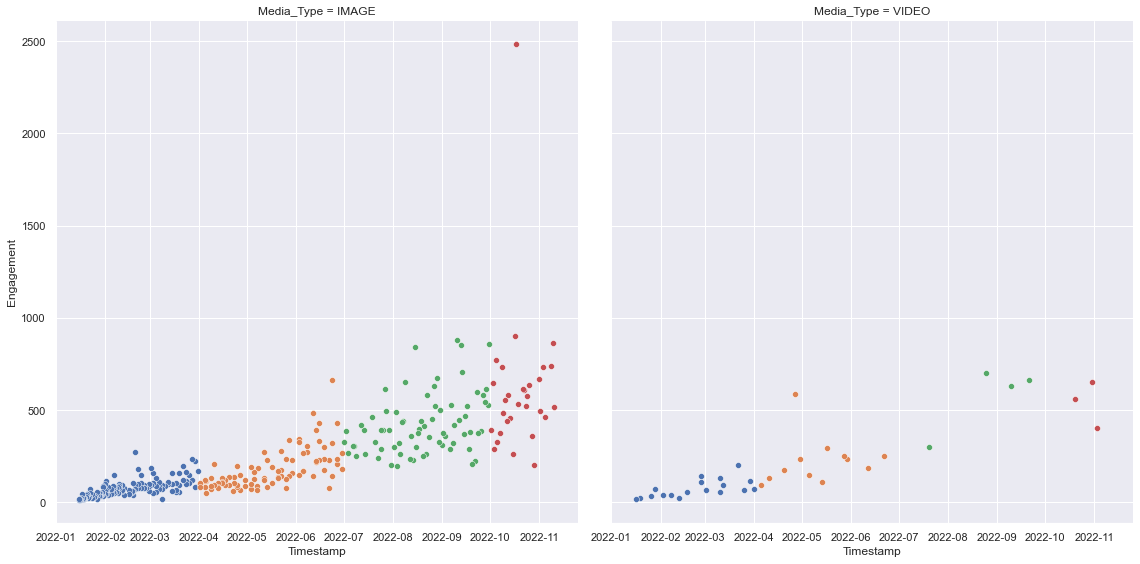

<Figure size 720x720 with 0 Axes>

In [302]:
g = sns.FacetGrid(PostInsight, 
                  hue = 'Quarter', 
                  col = 'Media_Type', 
                  col_order=['IMAGE','VIDEO'], 
                  height=8, 
                  legend_out=True, aspect= 1)

g.map(sns.scatterplot, 'Timestamp', 'Engagement')

plt.show()
plt.clf()

<ipython-input-313-f17656a130a0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation = 45)


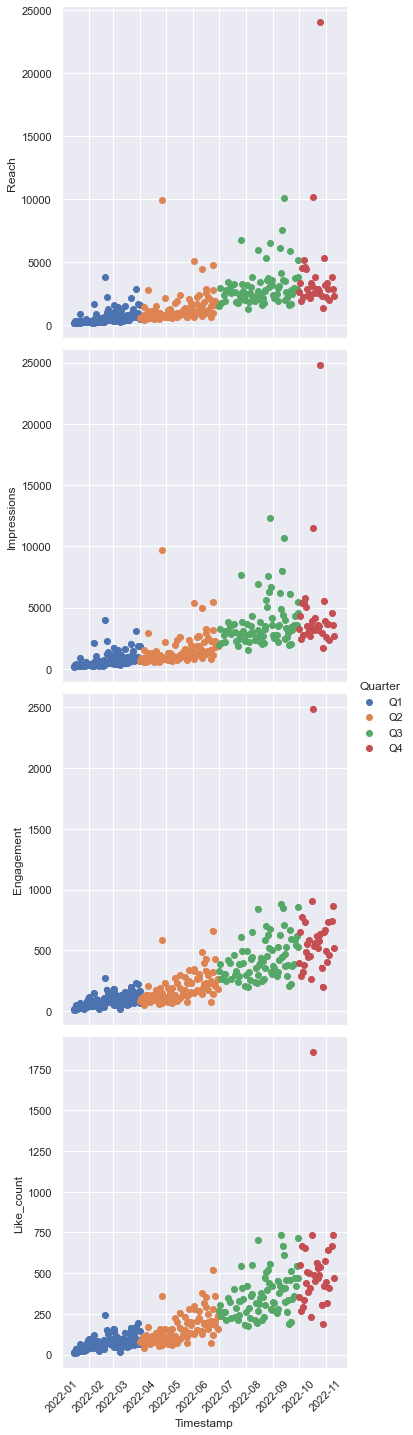

<Figure size 720x720 with 0 Axes>

In [313]:
#Plot all Metrics against Date
g = sns.pairplot(PostInsight, 
                 x_vars=['Timestamp'],
                 y_vars=["Reach", "Impressions", "Engagement", "Like_count"],
                 hue = 'Quarter',
                 kind='scatter',
                 aspect=1,
                 height=5)
g2 = g.map(plt.scatter)
for axis in g.fig.axes:  
     axis.set_xticklabels(axis.get_xticklabels(), rotation = 45)

plt.show()
plt.clf()

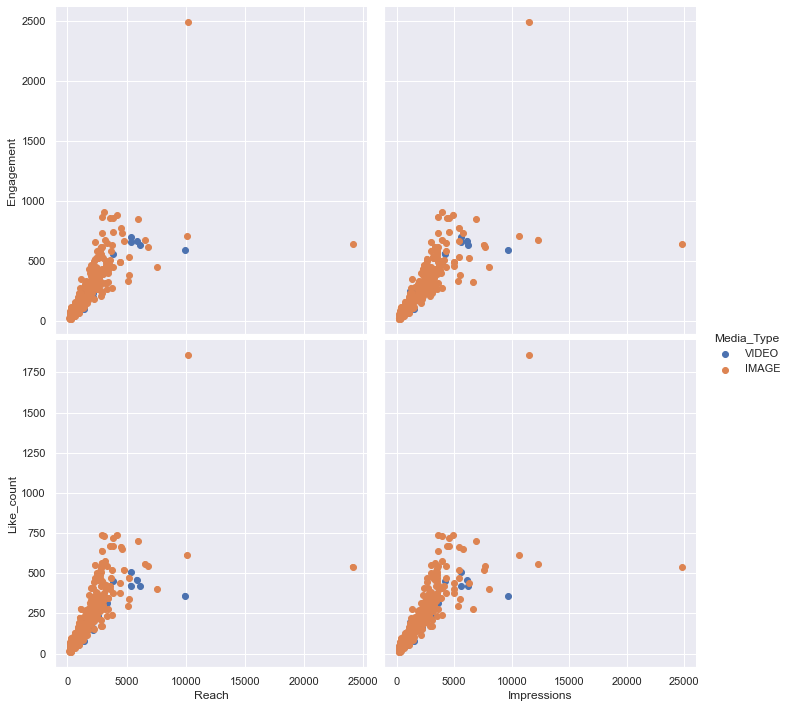

<Figure size 720x720 with 0 Axes>

In [316]:
g = sns.pairplot(PostInsight, 
                 x_vars=["Reach", "Impressions"],
                 y_vars=['Engagement', 'Like_count'],
                 kind='scatter',
                 hue='Media_Type',
                 height=5)
g2 = g.map(plt.scatter)
plt.show()
plt.clf()